In [475]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import tkinter
from sko.PSO import PSO
import matplotlib.pyplot as plt

In [476]:
np.random.seed(1)#控制变量

In [477]:
names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
HeartDisease = pandas.read_csv('./processed.cleveland.csv',header=None,names=names)

In [478]:
median=HeartDisease['ca'].median()
HeartDisease['ca'].fillna(median,inplace=True)
median=HeartDisease['thal'].median()
HeartDisease['thal'].fillna(median,inplace=True)
#HeartDisease.info()

In [479]:
label = HeartDisease['num']
data = HeartDisease.drop(['num'],axis=1)

In [480]:
if data.shape[0] == label.shape[0]:
    print('Sample number is equal to label number')
else:
    print('Sample number not equal to label number')
    exit(-1)

Sample number is equal to label number


In [481]:
clf=SVC(kernel='rbf')#测试不同svm在不同核函数下的性能
acc  = cross_val_score(clf, data,label, cv=3)#使用三倍交叉验证求准确率，后续同
print(np.mean(acc))

0.6171617161716171


In [482]:
clf = SVC(kernel='poly')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.6600660066006601


In [483]:
clf = SVC(kernel='sigmoid')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.5445544554455446


In [484]:
clf = SVC(kernel='linear')#测试不同svm在不同核函数下的性能
acc = cross_val_score(clf, data, label, cv=3)
print(np.mean(acc))

0.8283828382838284


In [485]:
def plot(position):#定义函数用于生成粒子的位置图
    x = []
    y = []
    for i in range(0,len(position)):
        x.append(position[i][0])
        y.append(position[i][1])
    plt.scatter(x, y, alpha = 0.1)  #生成散点图，透明度设置为0.1
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.axis([-0.1,1.1,-1,11])
    return plt.show()

In [486]:
class var:
    count=0
    bestsocre=0.0
    bestpos=[]
    tu=[]

In [487]:
def func(x):
    x1,x2=x
    clf = SVC
    socre = cross_val_score(clf(kernel='linear',C=x1, gamma=x2),data, label, cv=3).mean()
    if(socre>var.bestsocre):
        var.bestsocre=socre
        var.bestpos=x
    if var.count%10==0:
        print('iter', int(var.count / 10))
    print(x,socre)
    var.tu.append(x)
    if var.count%10==9:
        print('best position is',var.bestpos,'best score is',var.bestsocre)
        var.bestsocre=0
        plot(var.tu)
        var.tu=[]
    var.count+=1
    return 1-socre

In [488]:
class popvar:
    max_iter=50
    pop=10
    n_dim=2
    w=0.7
    c1=0.5
    c2=0.5
    lb=[0.001, 0.01]
    ub=[1, 10]

iter 0
[0.18707395 3.46215166] 0.834983498349835
[0.39737071 5.39277917] 0.8415841584158416
[0.41977532 6.85534281] 0.834983498349835
[0.2052478  8.78239319] 0.834983498349835
[0.02836021 6.70797043] 0.8283828382838284
[0.4178875  5.59131139] 0.834983498349835
[0.14124655 1.98903388] 0.834983498349835
[0.80094382 9.68293314] 0.821782178217822
[0.31411075 6.92630293] 0.8415841584158416
[0.87651276 8.94712057] 0.8250825082508251
best position is [0.39737071 5.39277917] best score is 0.8415841584158416


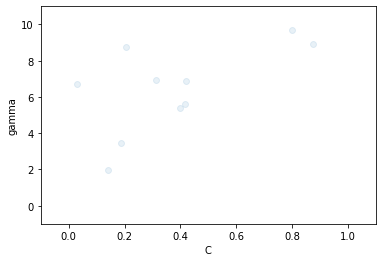

iter 1
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.66171053e+00] 0.712871287128713
[0.92940269 8.46714385] 0.8250825082508251
[0.40566945 4.11203827] 0.834983498349835
[ 0.66019625 10.        ] 0.8283828382838284
[1.0000000e-03 6.3945751e+00] 0.712871287128713
[ 1. 10.] 0.8283828382838284
[ 0.02561035 10.        ] 0.8250825082508252
[0.16802054 7.80786696] 0.834983498349835
best position is [0.40566945 4.11203827] best score is 0.834983498349835


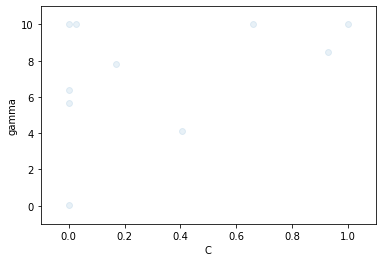

iter 2
[0.001 0.01 ] 0.712871287128713
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 4.72043749e+00] 0.712871287128713
[1.         7.98223754] 0.8283828382838284
[0.66978593 2.29488577] 0.8283828382838284
[ 0.80108783 10.        ] 0.821782178217822
[1.00000000e-03 9.46412421e+00] 0.712871287128713
[1.         8.55460737] 0.8283828382838284
[1.e-03 1.e+01] 0.712871287128713
[1.00000000e-03 5.63586297e+00] 0.712871287128713
best position is [1.         7.98223754] best score is 0.8283828382838284


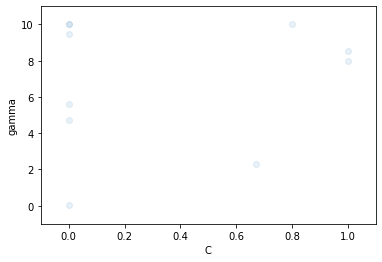

iter 3
[0.001 0.01 ] 0.712871287128713
[0.05169285 8.44805351] 0.8382838283828383
[1.00000000e-03 4.37226774e+00] 0.712871287128713
[1.         6.44927554] 0.8283828382838284
[0.68046937 2.45833284] 0.8283828382838284
[0.77485062 8.22124981] 0.821782178217822
[1.e-03 1.e+01] 0.712871287128713
[1.         6.34028124] 0.8283828382838284
[0.05426522 8.83652098] 0.8382838283828383
[1.00000000e-03 4.10054039e+00] 0.712871287128713
best position is [0.05169285 8.44805351] best score is 0.8382838283828383


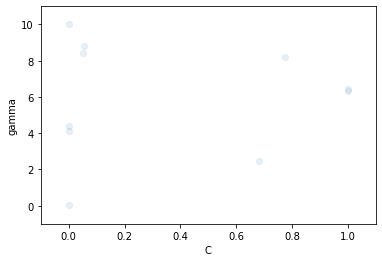

iter 4
[1.00000000e-03 1.39940672e+00] 0.712871287128713
[0.08717784 7.36169097] 0.8382838283828383
[1.00000000e-03 6.47132092e+00] 0.712871287128713
[1.         6.56838876] 0.8283828382838284
[0.43047132 5.55039922] 0.834983498349835
[0.54779054 7.57517727] 0.8316831683168316
[1.00000000e-03 8.58303154e+00] 0.712871287128713
[0.75015886 7.32867878] 0.821782178217822
[0.0905797 7.8864994] 0.8382838283828383
[0.04457607 4.86174424] 0.8415841584158416
best position is [0.04457607 4.86174424] best score is 0.8415841584158416


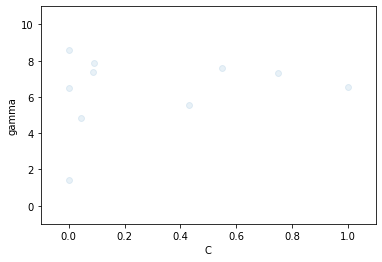

iter 5
[1.00000000e-03 3.10335726e+00] 0.712871287128713
[0.09509243 6.53710805] 0.8316831683168316
[2.90457632e-03 7.44924607e+00] 0.7524752475247526
[0.90186796 6.55087054] 0.8250825082508251
[0.18612931 7.02607346] 0.834983498349835
[0.15997761 6.77408985] 0.8382838283828383
[1.00000000e-03 6.85713886e+00] 0.712871287128713
[0.40754182 7.62664892] 0.834983498349835
[0.1097652  7.31321263] 0.8316831683168316
[0.07507932 5.39458693] 0.8415841584158416
best position is [0.07507932 5.39458693] best score is 0.8415841584158416


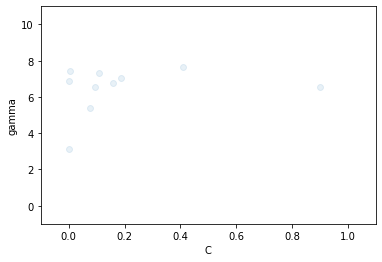

iter 6
[1.00000000e-03 3.33824111e+00] 0.712871287128713
[0.0625318  5.64466502] 0.8382838283828383
[0.01049368 7.94877975] 0.7986798679867988
[0.48738183 6.69250302] 0.8316831683168316
[1.00000000e-03 6.42117281e+00] 0.712871287128713
[1.00000000e-03 5.69119061e+00] 0.712871287128713
[1.00000000e-03 5.50590224e+00] 0.712871287128713
[0.1031555 7.7989821] 0.8316831683168316
[0.11076041 6.19375679] 0.8316831683168316
[0.0863243 5.5779273] 0.8415841584158416
best position is [0.0863243 5.5779273] best score is 0.8415841584158416


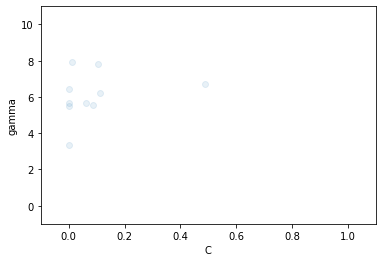

iter 7
[0.00617669 3.61952305] 0.778877887788779
[0.03333396 5.55182434] 0.8283828382838285
[0.02164188 6.99286655] 0.8085808580858087
[0.1023109 6.0373641] 0.834983498349835
[1.00000000e-03 4.77818189e+00] 0.712871287128713
[1.00000000e-03 4.94305947e+00] 0.712871287128713
[1.00000000e-03 4.61895348e+00] 0.712871287128713
[0.03097579 7.85973207] 0.8316831683168316
[0.07893291 5.25482305] 0.8415841584158416
[0.06965707 5.50522452] 0.8448844884488449
best position is [0.06965707 5.50522452] best score is 0.8448844884488449


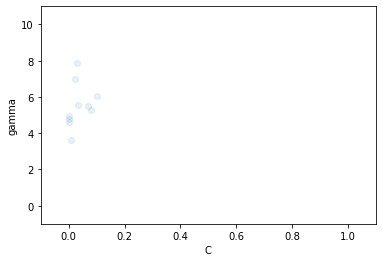

iter 8
[0.04098249 4.0678209 ] 0.8415841584158416
[0.0239236  5.70792003] 0.8184818481848186
[0.05131108 6.05107477] 0.8382838283828383
[1.00000000e-03 5.44246125e+00] 0.712871287128713
[0.15098509 3.39559678] 0.8382838283828383
[1.00000000e-03 5.03682353e+00] 0.712871287128713
[1.00000000e-03 4.38340198e+00] 0.712871287128713
[0.00924657 6.79571709] 0.7887788778877889
[0.05406331 4.68398646] 0.8382838283828383
[0.05799    5.45433258] 0.8382838283828383
best position is [0.04098249 4.0678209 ] best score is 0.8415841584158416


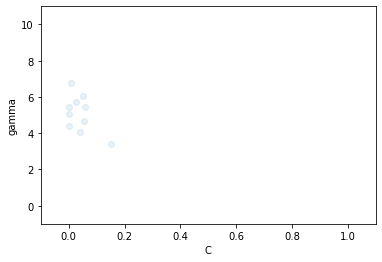

iter 9
[0.07386824 5.08307451] 0.8415841584158416
[0.04037869 6.588583  ] 0.8415841584158416
[0.07237697 5.36628099] 0.8415841584158416
[1.00000000e-03 5.24897955e+00] 0.712871287128713
[0.24070797 3.45659996] 0.8382838283828383
[0.02169482 5.37976687] 0.8085808580858087
[0.02416647 5.34865283] 0.821782178217822
[0.11217062 5.83504271] 0.8316831683168316
[0.04254539 4.45268764] 0.8415841584158416
[0.05769692 5.45201463] 0.8382838283828383
best position is [0.07386824 5.08307451] best score is 0.8415841584158416


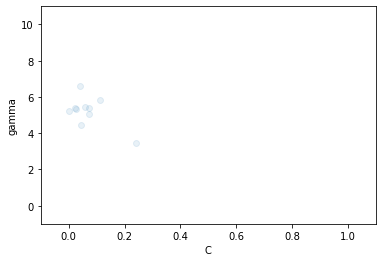

iter 10
[0.08801534 5.57000209] 0.8382838283828383
[0.06173084 7.01414327] 0.8382838283828383
[0.08595921 4.90047493] 0.8415841584158416
[1.0000000e-03 5.1556153e+00] 0.712871287128713
[0.20716649 3.91649004] 0.8382838283828383
[0.08661226 6.27975948] 0.8382838283828383
[0.04524351 6.08439594] 0.8415841584158416
[0.24919982 5.81143143] 0.8382838283828383
[0.0596829  4.66764734] 0.8382838283828383
[0.06280094 5.47107601] 0.8382838283828383
best position is [0.08595921 4.90047493] best score is 0.8415841584158416


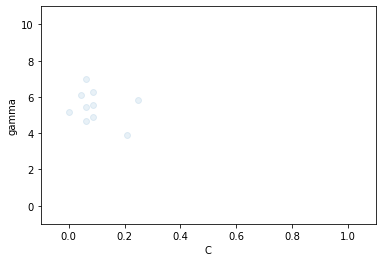

iter 11
[0.0694864  5.34992513] 0.8448844884488449
[0.07326039 6.69505605] 0.8448844884488449
[0.08838074 4.86420152] 0.8382838283828383
[1.00000000e-03 5.34942207e+00] 0.712871287128713
[0.15170115 4.26382387] 0.8382838283828383
[0.15113874 6.81305684] 0.8382838283828383
[0.06647554 6.45632711] 0.8415841584158416
[0.33325598 5.7632947 ] 0.8415841584158416
[0.07926755 5.21820421] 0.8415841584158416
[0.06931735 5.49556068] 0.8448844884488449
best position is [0.0694864  5.34992513] best score is 0.8448844884488449


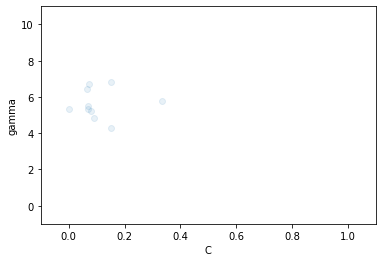

iter 12
[0.0565802  5.24348693] 0.8382838283828383
[0.08060705 6.05685547] 0.8415841584158416
[0.08316315 5.22748048] 0.8415841584158416
[0.03424506 5.76471675] 0.8349834983498351
[0.10766462 4.21507624] 0.8316831683168316
[0.18522858 6.60886447] 0.834983498349835
[0.07228769 6.42079349] 0.8448844884488449
[0.37386021 5.69216017] 0.8415841584158416
[0.08990872 5.66440223] 0.8382838283828383
[0.0740202  5.51856803] 0.8415841584158416
best position is [0.07228769 6.42079349] best score is 0.8448844884488449


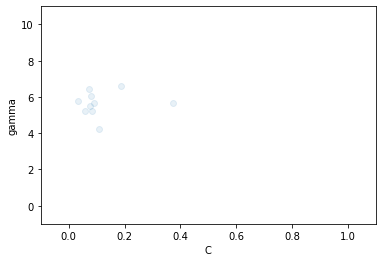

iter 13
[0.05392187 5.24335994] 0.8382838283828383
[0.07775292 5.76869962] 0.8415841584158416
[0.07126885 5.65987141] 0.8448844884488449
[0.06530424 6.02224108] 0.8382838283828383
[0.08200537 4.27702148] 0.8415841584158416
[0.19887339 6.02397476] 0.834983498349835
[0.07517771 6.17089822] 0.8415841584158416
[0.26100894 5.63698994] 0.8382838283828383
[0.08701059 5.77345606] 0.8382838283828383
[0.07619158 5.52680789] 0.8415841584158416
best position is [0.07126885 5.65987141] best score is 0.8448844884488449


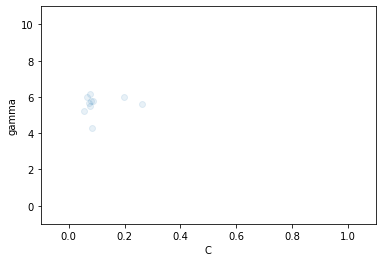

iter 14
[0.05688875 5.32371093] 0.8382838283828383
[0.07286205 5.56612788] 0.8448844884488449
[0.0622269  5.94828783] 0.8382838283828383
[0.08831963 5.97031467] 0.8382838283828383
[0.06128951 4.88650388] 0.8382838283828383
[0.1737234  5.68901698] 0.834983498349835
[0.07495275 6.01908169] 0.8415841584158416
[0.19633509 5.59349355] 0.834983498349835
[0.07550498 5.62294901] 0.8415841584158416
[0.07428617 5.52196742] 0.8415841584158416
best position is [0.07286205 5.56612788] best score is 0.8448844884488449


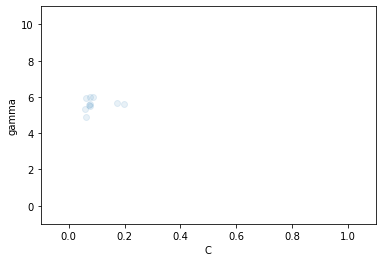

iter 15
[0.06733676 5.43967612] 0.8415841584158416
[0.06926829 5.70023082] 0.8448844884488449
[0.06352009 5.91357344] 0.8382838283828383
[0.09308472 5.90981977] 0.834983498349835
[0.05461326 5.43891598] 0.8382838283828383
[0.12937868 5.55729117] 0.8382838283828383
[0.07208314 5.85518002] 0.8448844884488449
[0.13269604 5.58901225] 0.8382838283828383
[0.06499658 5.41998238] 0.8382838283828383
[0.06997056 5.51093892] 0.8448844884488449
best position is [0.06926829 5.70023082] best score is 0.8448844884488449


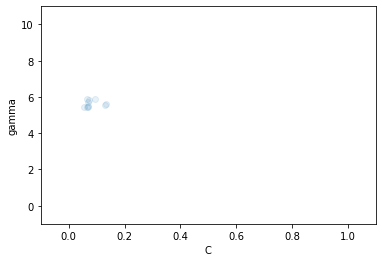

iter 16
[0.07636978 5.52148601] 0.8415841584158416
[0.06813902 5.96549178] 0.8415841584158416
[0.067066   5.79738776] 0.8415841584158416
[0.08371677 5.69544196] 0.8415841584158416
[0.06993588 5.62890032] 0.8448844884488449
[0.08903023 5.78114645] 0.8382838283828383
[0.06956509 5.7483503 ] 0.8448844884488449
[0.10801666 5.64978708] 0.8316831683168316
[0.05827546 5.23037384] 0.8382838283828383
[0.06678765 5.50086109] 0.8415841584158416
best position is [0.06993588 5.62890032] best score is 0.8448844884488449


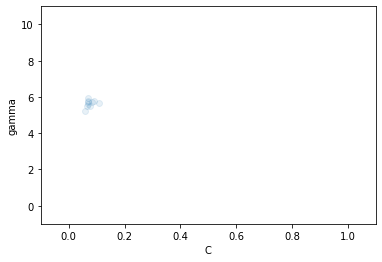

iter 17
[0.07960571 5.53881932] 0.8415841584158416
[0.07008628 6.21195142] 0.8448844884488449
[0.07125268 5.62685382] 0.8448844884488449
[0.07470461 5.45623665] 0.8415841584158416
[0.08059346 5.72851859] 0.8415841584158416
[0.0755037  5.91143592] 0.8415841584158416
[0.06805053 5.64831654] 0.8415841584158416
[0.09830519 5.7055866 ] 0.8316831683168316
[0.06084569 5.13182353] 0.8382838283828383
[0.06632336 5.49628559] 0.8382838283828383
best position is [0.07008628 6.21195142] best score is 0.8448844884488449


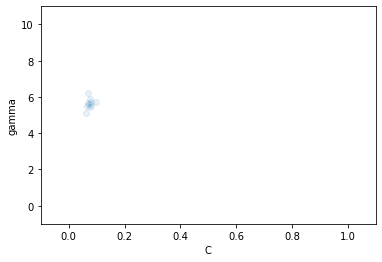

iter 18
[0.07933163 5.48214847] 0.8415841584158416
[0.07195546 6.3577238 ] 0.8448844884488449
[0.07377747 5.48461937] 0.8448844884488449
[0.07069218 5.40076928] 0.8448844884488449
[0.08306913 5.78603362] 0.8415841584158416
[0.06348287 5.86936028] 0.8382838283828383
[0.06773005 5.77819081] 0.8415841584158416
[0.16952752 5.73351738] 0.834983498349835
[0.06986751 5.17452645] 0.8448844884488449
[0.06750467 5.49405001] 0.8415841584158416
best position is [0.07195546 6.3577238 ] best score is 0.8448844884488449


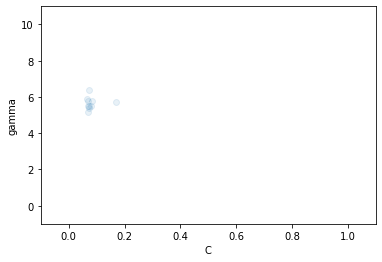

iter 19
[0.07016947 5.39959069] 0.8448844884488449
[0.07235674 6.23072124] 0.8448844884488449
[0.07366227 5.44422831] 0.8448844884488449
[0.0676106  5.39457505] 0.8415841584158416
[0.07512497 5.72267858] 0.8415841584158416
[0.05812178 5.73929481] 0.8382838283828383
[0.0695364  6.03679633] 0.8448844884488449
[0.2331161  5.72943371] 0.8382838283828383
[0.07616895 5.23117985] 0.8415841584158416
[0.06969464 5.49620965] 0.8448844884488449
best position is [0.07016947 5.39959069] best score is 0.8448844884488449


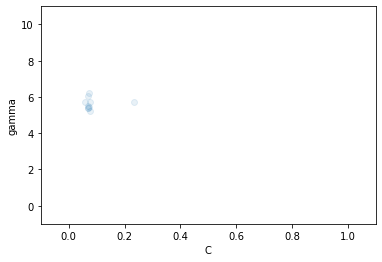

iter 20
[0.06333396 5.3508    ] 0.8382838283828383
[0.07221577 6.25019136] 0.8448844884488449
[0.07258613 5.44054651] 0.8448844884488449
[0.06681499 5.42394282] 0.8415841584158416
[0.06733283 5.64285113] 0.8415841584158416
[0.06028335 5.57734304] 0.8382838283828383
[0.07193391 6.02036732] 0.8448844884488449
[0.28627327 5.67293668] 0.8382838283828383
[0.07598608 5.34649402] 0.8415841584158416
[0.07121367 5.50508322] 0.8448844884488449
best position is [0.07221577 6.25019136] best score is 0.8448844884488449


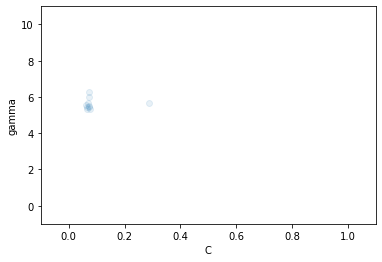

iter 21
[0.06069198 5.33209482] 0.8382838283828383
[0.07163465 5.97377721] 0.8448844884488449
[0.07084558 5.53189232] 0.8448844884488449
[0.06888482 5.45221504] 0.8415841584158416
[0.0627869  5.52345379] 0.8382838283828383
[0.0656641  5.46546958] 0.8382838283828383
[0.07339941 5.93602582] 0.8448844884488449
[0.26825819 5.6194406 ] 0.8382838283828383
[0.07279855 5.4408012 ] 0.8448844884488449
[0.07094417 5.51139921] 0.8448844884488449
best position is [0.07163465 5.97377721] best score is 0.8448844884488449


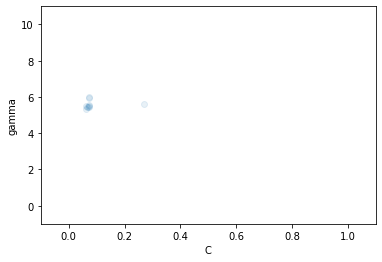

iter 22
[0.06464965 5.37833784] 0.8382838283828383
[0.07167801 5.83392863] 0.8448844884488449
[0.06957552 5.62343186] 0.8448844884488449
[0.07091917 5.4756892 ] 0.8448844884488449
[0.06434537 5.4556362 ] 0.8382838283828383
[0.07165895 5.60669397] 0.8448844884488449
[0.07348511 5.99771774] 0.8448844884488449
[0.23440511 5.57850768] 0.8382838283828383
[0.06943885 5.39298863] 0.8448844884488449
[0.07051277 5.51250911] 0.8448844884488449
best position is [0.07167801 5.83392863] best score is 0.8448844884488449


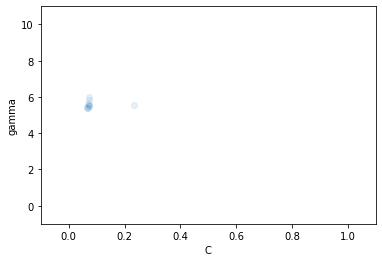

iter 23
[0.07155509 5.4291394 ] 0.8448844884488449
[0.07138787 5.83084732] 0.8448844884488449
[0.06904328 5.6612282 ] 0.8448844884488449
[0.07194321 5.50077501] 0.8448844884488449
[0.06654907 5.48573394] 0.8415841584158416
[0.07548902 5.6748917 ] 0.8415841584158416
[0.07170491 6.08767319] 0.8448844884488449
[0.20320711 5.54221889] 0.834983498349835
[0.06719493 5.3614179 ] 0.8415841584158416
[0.0695548  5.50823567] 0.8448844884488449
best position is [0.07155509 5.4291394 ] best score is 0.8448844884488449


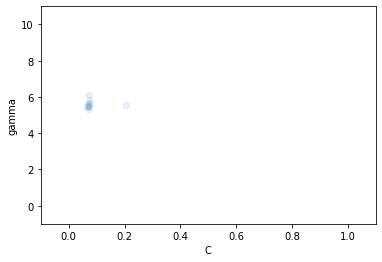

iter 24
[0.07481016 5.49260412] 0.8415841584158416
[0.07142162 5.74700296] 0.8448844884488449
[0.06891679 5.62769443] 0.8415841584158416
[0.07200195 5.49890213] 0.8448844884488449
[0.06943346 5.53629578] 0.8448844884488449
[0.07486614 5.69982289] 0.8415841584158416
[0.0700104  6.03334375] 0.8448844884488449
[0.18211053 5.57556064] 0.834983498349835
[0.0664665  5.32576065] 0.8415841584158416
[0.06896257 5.50268367] 0.8415841584158416
best position is [0.07142162 5.74700296] best score is 0.8448844884488449


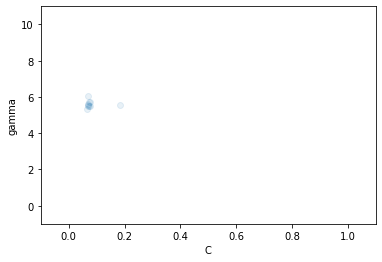

iter 25
[0.07518694 5.52340316] 0.8415841584158416
[0.07188081 5.95912203] 0.8415841584158416
[0.06922533 5.56425525] 0.8448844884488449
[0.07146693 5.49645118] 0.8448844884488449
[0.07169544 5.59920339] 0.8448844884488449
[0.072815   5.60227987] 0.8448844884488449
[0.06902903 6.00799073] 0.8448844884488449
[0.18912391 5.65693037] 0.834983498349835
[0.06837753 5.23221548] 0.8415841584158416
[0.06887637 5.49946275] 0.8415841584158416
best position is [0.06922533 5.56425525] best score is 0.8448844884488449


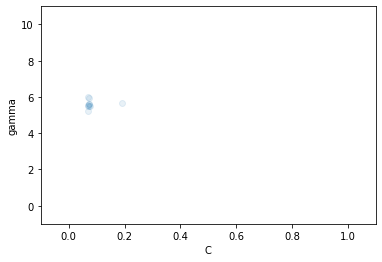

iter 26
[0.07177104 5.53392786] 0.8448844884488449
[0.07165796 6.45720513] 0.8448844884488449
[0.06984355 5.53775025] 0.8448844884488449
[0.06985687 5.45064534] 0.8448844884488449
[0.07288376 5.64578267] 0.8448844884488449
[0.07093884 5.53397097] 0.8448844884488449
[0.06905831 6.01181763] 0.8448844884488449
[0.2094302  5.66980056] 0.8382838283828383
[0.07002695 5.19785491] 0.8448844884488449
[0.06931628 5.49995745] 0.8448844884488449
best position is [0.07177104 5.53392786] best score is 0.8448844884488449


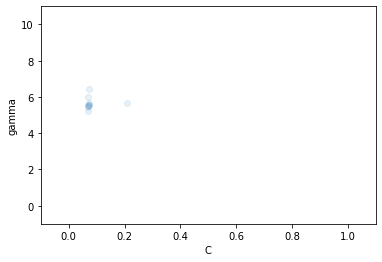

iter 27
[0.06844269 5.48641476] 0.8415841584158416
[0.07147294 6.52752974] 0.8448844884488449
[0.0706067  5.57711127] 0.8448844884488449
[0.06898533 5.43202331] 0.8415841584158416
[0.07085573 5.65685052] 0.8448844884488449
[0.06924579 5.49800576] 0.8448844884488449
[0.06990945 5.90807896] 0.8448844884488449
[0.21013221 5.68754922] 0.8382838283828383
[0.07111449 5.21161393] 0.8448844884488449
[0.06969355 5.50271255] 0.8448844884488449
best position is [0.07147294 6.52752974] best score is 0.8448844884488449


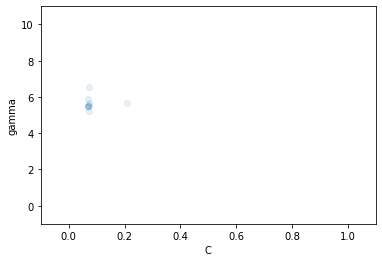

iter 28
[0.06715077 5.4370359 ] 0.8415841584158416
[0.07113182 6.34673951] 0.8448844884488449
[0.07095417 5.63769952] 0.8448844884488449
[0.0689748  5.42902543] 0.8415841584158416
[0.06888878 5.6002448 ] 0.8415841584158416
[0.06885055 5.50273988] 0.8415841584158416
[0.07131449 5.99355313] 0.8448844884488449
[0.19874813 5.69399758] 0.834983498349835
[0.07149684 5.26042342] 0.8448844884488449
[0.06994024 5.50510343] 0.8448844884488449
best position is [0.07113182 6.34673951] best score is 0.8448844884488449


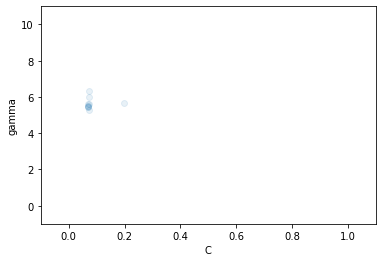

iter 29
[0.06796481 5.3963709 ] 0.8415841584158416
[0.07136424 6.08442354] 0.8448844884488449
[0.07070521 5.67394481] 0.8448844884488449
[0.07003896 5.43838485] 0.8448844884488449
[0.06776732 5.54227715] 0.8415841584158416
[0.0695251  5.52796944] 0.8448844884488449
[0.07195898 5.99887216] 0.8448844884488449
[0.14857372 5.69807892] 0.834983498349835
[0.07067238 5.3272215 ] 0.8448844884488449
[0.06988673 5.50686178] 0.8448844884488449
best position is [0.07136424 6.08442354] best score is 0.8448844884488449


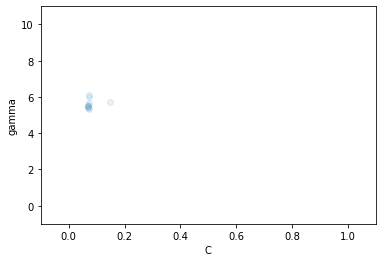

iter 30
[0.06940801 5.40159404] 0.8448844884488449
[0.07134916 5.80949699] 0.8448844884488449
[0.07066703 5.68582443] 0.8448844884488449
[0.07086007 5.43356073] 0.8448844884488449
[0.06812369 5.51385457] 0.8415841584158416
[0.07022871 5.57986067] 0.8448844884488449
[0.07152169 5.92075824] 0.8448844884488449
[0.10911329 5.63386959] 0.8316831683168316
[0.06997657 5.41018188] 0.8448844884488449
[0.06973192 5.50683082] 0.8448844884488449
best position is [0.06940801 5.40159404] best score is 0.8448844884488449


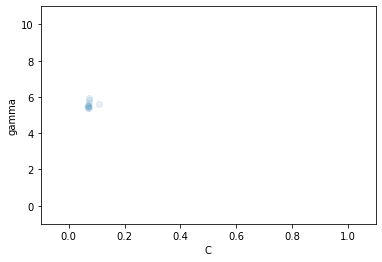

iter 31
[0.0705409  5.43137629] 0.8448844884488449
[0.07136574 5.52261411] 0.8448844884488449
[0.07069608 5.59710636] 0.8448844884488449
[0.07111191 5.43229726] 0.8448844884488449
[0.06876741 5.54641991] 0.8415841584158416
[0.07060856 5.6012858 ] 0.8448844884488449
[0.07097468 5.81358023] 0.8448844884488449
[0.10451803 5.56981428] 0.8316831683168316
[0.06933174 5.39984549] 0.8448844884488449
[0.06957797 5.50634994] 0.8448844884488449
best position is [0.0705409  5.43137629] best score is 0.8448844884488449


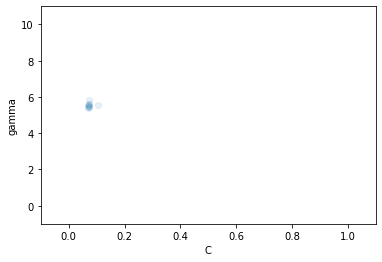

iter 32
[0.07094695 5.4708785 ] 0.8448844884488449
[0.07111846 5.73188571] 0.8448844884488449
[0.07046897 5.52356837] 0.8448844884488449
[0.07050619 5.46066859] 0.8448844884488449
[0.07012605 5.60147997] 0.8448844884488449
[0.07096557 5.57404259] 0.8448844884488449
[0.07035742 5.82007609] 0.8448844884488449
[0.19122387 5.60042104] 0.834983498349835
[0.06906265 5.38041459] 0.8448844884488449
[0.06953681 5.50497253] 0.8448844884488449
best position is [0.07094695 5.4708785 ] best score is 0.8448844884488449


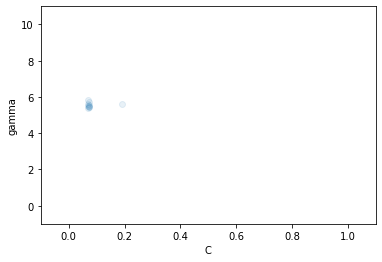

iter 33
[0.07032824 5.45441511] 0.8448844884488449
[0.07035912 6.15650685] 0.8448844884488449
[0.07017046 5.50541004] 0.8448844884488449
[0.0697691  5.48891222] 0.8448844884488449
[0.07094684 5.62132663] 0.8448844884488449
[0.07070122 5.56236019] 0.8448844884488449
[0.06973108 5.86226893] 0.8448844884488449
[0.22830971 5.66737035] 0.8382838283828383
[0.06901993 5.35753144] 0.8415841584158416
[0.0695537  5.50412133] 0.8448844884488449
best position is [0.07032824 5.45441511] best score is 0.8448844884488449


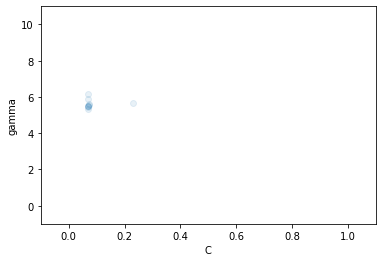

iter 34
[0.06959069 5.45878859] 0.8448844884488449
[0.07083399 6.32130669] 0.8448844884488449
[0.07045149 5.50983312] 0.8448844884488449
[0.06942102 5.47406563] 0.8448844884488449
[0.07091934 5.60820853] 0.8448844884488449
[0.07041465 5.55677255] 0.8448844884488449
[0.07049483 5.92736292] 0.8448844884488449
[0.28463843 5.75648042] 0.8382838283828383
[0.06917418 5.38442228] 0.8448844884488449
[0.06959014 5.50399033] 0.8448844884488449
best position is [0.06959069 5.45878859] best score is 0.8448844884488449


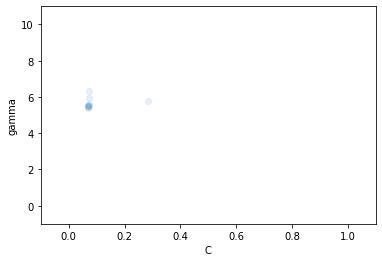

iter 35
[0.06908688 5.469117  ] 0.8448844884488449
[0.07130615 6.51177588] 0.8448844884488449
[0.07072843 5.58213935] 0.8448844884488449
[0.06946546 5.44841163] 0.8448844884488449
[0.07012282 5.56243797] 0.8448844884488449
[0.06991277 5.54338089] 0.8448844884488449
[0.07096184 5.98370367] 0.8448844884488449
[0.22736546 5.74307511] 0.8382838283828383
[0.06965965 5.35102453] 0.8448844884488449
[0.06966747 5.50401239] 0.8448844884488449
best position is [0.06908688 5.469117  ] best score is 0.8448844884488449


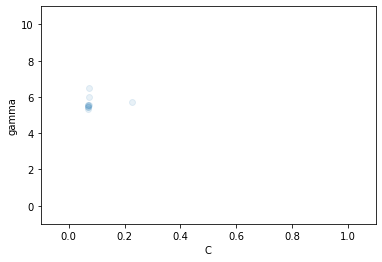

iter 36
[0.06916066 5.46534583] 0.8448844884488449
[0.07146465 6.4797898 ] 0.8448844884488449
[0.07074346 5.6192856 ] 0.8448844884488449
[0.06988182 5.41870291] 0.8448844884488449
[0.06947518 5.53958713] 0.8448844884488449
[0.06968739 5.54881774] 0.8448844884488449
[0.07073971 6.19936693] 0.8448844884488449
[0.14226542 5.6612951 ] 0.834983498349835
[0.07006176 5.38121749] 0.8448844884488449
[0.06971789 5.504673  ] 0.8448844884488449
best position is [0.06916066 5.46534583] best score is 0.8448844884488449


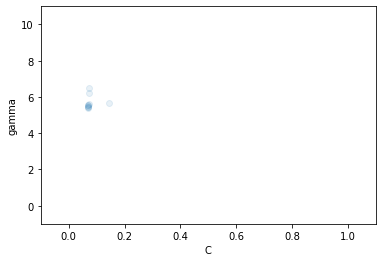

iter 37
[0.06931834 5.43690525] 0.8448844884488449
[0.07233262 6.35622627] 0.8448844884488449
[0.07078156 5.61325656] 0.8448844884488449
[0.07024789 5.4113561 ] 0.8448844884488449
[0.06922442 5.55524596] 0.8448844884488449
[0.07011054 5.54926467] 0.8448844884488449
[0.07049967 6.39697057] 0.8448844884488449
[0.07730033 5.62085611] 0.8415841584158416
[0.07018461 5.39562627] 0.8448844884488449
[0.06973873 5.50533181] 0.8448844884488449
best position is [0.06931834 5.43690525] best score is 0.8448844884488449


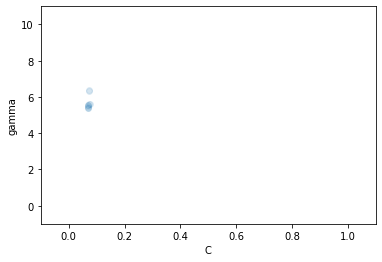

iter 38
[0.0696202  5.39465859] 0.8448844884488449
[0.07242544 5.98110757] 0.8448844884488449
[0.07068734 5.61435806] 0.8448844884488449
[0.07047222 5.43703204] 0.8448844884488449
[0.06935179 5.56364563] 0.8448844884488449
[0.07091928 5.55280809] 0.8448844884488449
[0.0703085  6.27545906] 0.8448844884488449
[0.14147103 5.54905184] 0.834983498349835
[0.07016951 5.39677904] 0.8448844884488449
[0.06969661 5.50573405] 0.8448844884488449
best position is [0.0696202  5.39465859] best score is 0.8448844884488449


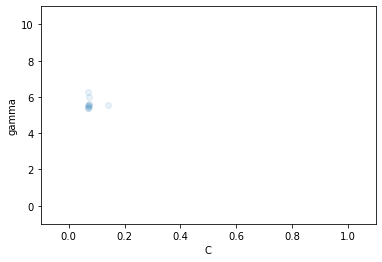

iter 39
[0.06979773 5.39094505] 0.8448844884488449
[0.0723426  5.82610698] 0.8448844884488449
[0.07058803 5.61424357] 0.8448844884488449
[0.07051161 5.45324363] 0.8448844884488449
[0.06974218 5.55988923] 0.8448844884488449
[0.07101948 5.55612662] 0.8448844884488449
[0.07054116 5.99945446] 0.8448844884488449
[0.18797645 5.53099388] 0.834983498349835
[0.06991841 5.33388131] 0.8448844884488449
[0.06965529 5.5058083 ] 0.8448844884488449
best position is [0.06979773 5.39094505] best score is 0.8448844884488449


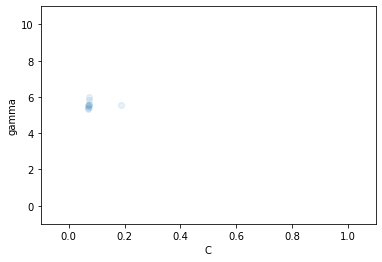

iter 40
[0.06976523 5.40011714] 0.8448844884488449
[0.0725064  5.96702654] 0.8448844884488449
[0.07035735 5.60044551] 0.8448844884488449
[0.07034687 5.46080731] 0.8448844884488449
[0.07009169 5.56246518] 0.8448844884488449
[0.07086678 5.5395238 ] 0.8448844884488449
[0.07095615 5.82374806] 0.8448844884488449
[0.24160184 5.52680196] 0.8382838283828383
[0.06971781 5.2597865 ] 0.8448844884488449
[0.06962708 5.50570707] 0.8448844884488449
best position is [0.06976523 5.40011714] best score is 0.8448844884488449


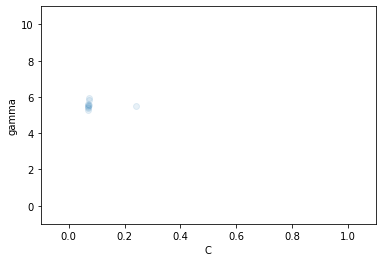

iter 41
[0.06959225 5.43407677] 0.8448844884488449
[0.07186967 6.09598425] 0.8448844884488449
[0.07001114 5.56333862] 0.8448844884488449
[0.07021804 5.45880267] 0.8448844884488449
[0.0701551  5.55775499] 0.8448844884488449
[0.07074759 5.54498427] 0.8448844884488449
[0.0716422 5.6005741] 0.8448844884488449
[0.31087928 5.57869357] 0.8415841584158416
[0.06961597 5.25007232] 0.8448844884488449
[0.06962714 5.50541182] 0.8448844884488449
best position is [0.06959225 5.43407677] best score is 0.8448844884488449


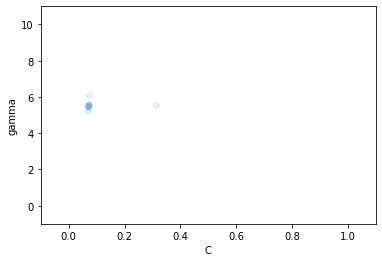

iter 42
[0.06943628 5.47371959] 0.8448844884488449
[0.07154144 6.09028571] 0.8448844884488449
[0.06990105 5.52163218] 0.8448844884488449
[0.07004338 5.45506317] 0.8448844884488449
[0.06992581 5.55006726] 0.8448844884488449
[0.07054595 5.54010635] 0.8448844884488449
[0.0714722  5.41738653] 0.8448844884488449
[0.35268943 5.64775441] 0.8415841584158416
[0.06959874 5.35457353] 0.8448844884488449
[0.06964058 5.50509356] 0.8448844884488449
best position is [0.06943628 5.47371959] best score is 0.8448844884488449


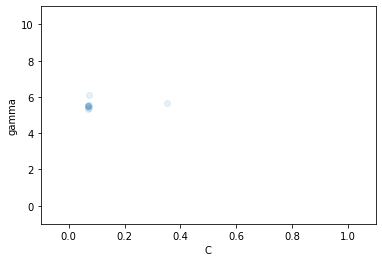

iter 43
[0.06935047 5.47988306] 0.8448844884488449
[0.07059131 6.2474007 ] 0.8448844884488449
[0.0698168  5.50957025] 0.8448844884488449
[0.07005811 5.45079419] 0.8448844884488449
[0.06970198 5.52476119] 0.8448844884488449
[0.07077274 5.55574479] 0.8448844884488449
[0.07072574 5.32527163] 0.8448844884488449
[0.33303399 5.65361092] 0.8415841584158416
[0.06973915 5.4222385 ] 0.8448844884488449
[0.06965672 5.5049529 ] 0.8448844884488449
best position is [0.06935047 5.47988306] best score is 0.8448844884488449


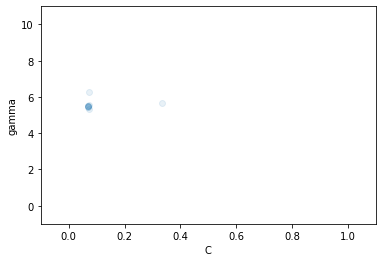

iter 44
[0.06931957 5.46302183] 0.8448844884488449
[0.07053472 6.11467532] 0.8448844884488449
[0.07034363 5.54775189] 0.8448844884488449
[0.06997255 5.44937991] 0.8448844884488449
[0.06962721 5.52439833] 0.8448844884488449
[0.07072409 5.56560682] 0.8448844884488449
[0.06985001 5.81257575] 0.8448844884488449
[0.26498754 5.61779156] 0.8382838283828383
[0.06982932 5.38585575] 0.8448844884488449
[0.06966811 5.50503988] 0.8448844884488449
best position is [0.06931957 5.46302183] best score is 0.8448844884488449


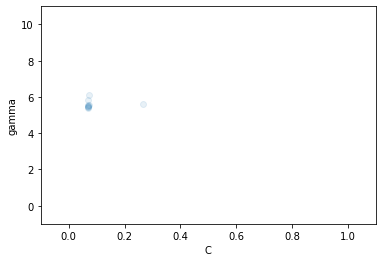

iter 45
[0.06944637 5.45359053] 0.8448844884488449
[0.07084733 5.95556159] 0.8448844884488449
[0.07066596 5.59287872] 0.8448844884488449
[0.06992474 5.45959036] 0.8448844884488449
[0.06966186 5.55179822] 0.8448844884488449
[0.07063633 5.55166753] 0.8448844884488449
[0.0695531 6.3714755] 0.8448844884488449
[0.18272679 5.59444173] 0.834983498349835
[0.06989764 5.33488717] 0.8448844884488449
[0.06967031 5.50525877] 0.8448844884488449
best position is [0.06944637 5.45359053] best score is 0.8448844884488449


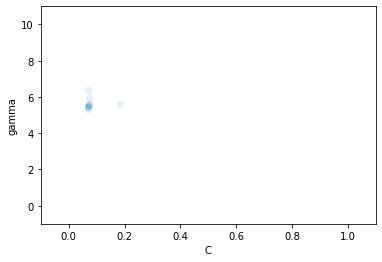

iter 46
[0.06960724 5.44935829] 0.8448844884488449
[0.07068981 5.69303028] 0.8448844884488449
[0.0706208  5.64835191] 0.8448844884488449
[0.07001837 5.44864772] 0.8448844884488449
[0.06970985 5.60390223] 0.8448844884488449
[0.07061896 5.53468415] 0.8448844884488449
[0.06994247 6.65632257] 0.8448844884488449
[0.19277586 5.5805469 ] 0.834983498349835
[0.06990309 5.37175941] 0.8448844884488449
[0.0696679  5.50539424] 0.8448844884488449
best position is [0.06960724 5.44935829] best score is 0.8448844884488449


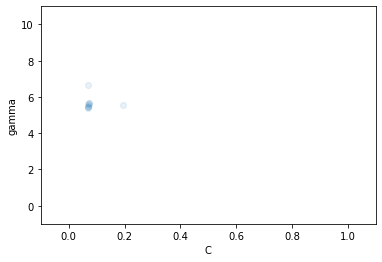

iter 47
[0.06970667 5.44291501] 0.8448844884488449
[0.0704471  5.91683137] 0.8448844884488449
[0.07055302 5.6477003 ] 0.8448844884488449
[0.07015833 5.45094784] 0.8448844884488449
[0.0697273  5.61348663] 0.8448844884488449
[0.07045091 5.51847839] 0.8448844884488449
[0.07023556 6.29675425] 0.8448844884488449
[0.22941758 5.63230132] 0.8382838283828383
[0.06978424 5.38333654] 0.8448844884488449
[0.06966299 5.50542381] 0.8448844884488449
best position is [0.06970667 5.44291501] best score is 0.8448844884488449


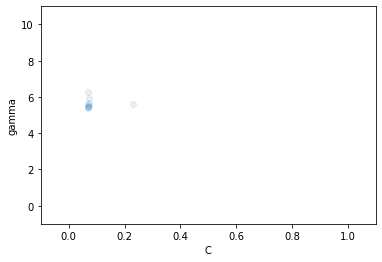

iter 48
[0.06974068 5.42755578] 0.8448844884488449
[0.07101594 5.99398768] 0.8448844884488449
[0.07038871 5.61354289] 0.8448844884488449
[0.07017505 5.43940408] 0.8448844884488449
[0.0697539  5.60434411] 0.8448844884488449
[0.07069542 5.53173482] 0.8448844884488449
[0.07100645 5.98096897] 0.8448844884488449
[0.20112223 5.70181186] 0.834983498349835
[0.06970582 5.36502765] 0.8448844884488449
[0.06965431 5.50540049] 0.8448844884488449
best position is [0.06974068 5.42755578] best score is 0.8448844884488449


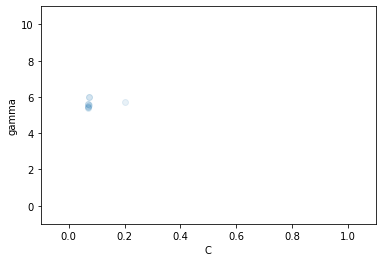

iter 49
[0.0696413  5.43998519] 0.8448844884488449
[0.07169658 6.32583883] 0.8448844884488449
[0.07029047 5.5841681 ] 0.8448844884488449
[0.07042637 5.45716744] 0.8448844884488449
[0.06977368 5.56068071] 0.8448844884488449
[0.07101789 5.56260281] 0.8448844884488449
[0.07194258 5.73201781] 0.8448844884488449
[0.15439704 5.74751581] 0.8382838283828383
[0.06966588 5.36147117] 0.8448844884488449
[0.06964991 5.50535571] 0.8448844884488449
best position is [0.0696413  5.43998519] best score is 0.8448844884488449


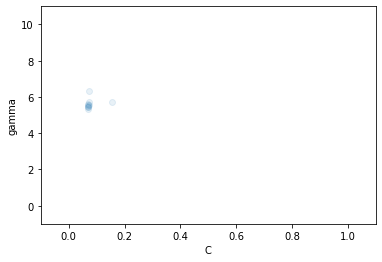

iter 50
[0.06956708 5.45007031] 0.8448844884488449
[0.07199284 6.57236537] 0.8448844884488449
[0.07042688 5.58411179] 0.8448844884488449
[0.07050262 5.47580492] 0.8448844884488449
[0.06974373 5.53915029] 0.8448844884488449
[0.07132481 5.58877621] 0.8448844884488449
[0.07245863 5.49137537] 0.8448844884488449
[0.14011044 5.68861002] 0.834983498349835
[0.06971565 5.31042787] 0.8448844884488449
[0.06965027 5.50526202] 0.8448844884488449
best position is [0.06956708 5.45007031] best score is 0.8448844884488449


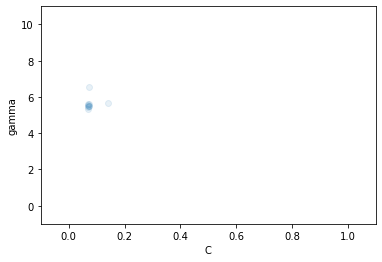

best_C and best_gamma is  [0.06965707 5.50522452] best_cost is [0.15511551]


In [489]:
pso = PSO(func=func, n_dim=popvar.n_dim, pop=popvar.pop, max_iter=popvar.max_iter, lb=popvar.lb, ub=popvar.ub, w=popvar.w, c1=popvar.c1, c2=popvar.c2)
pso.record_mode = True #记录粒子的历史位置
pso.run()
print('best_C and best_gamma is ', pso.gbest_x, 'best_cost is', pso.gbest_y)

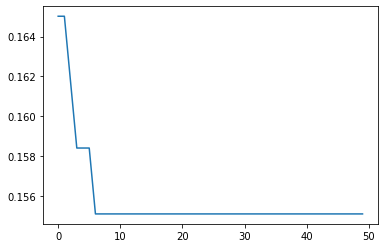

In [490]:
plt.plot(pso.gbest_y_hist)#绘制每一论损失率的折线图
plt.show()

In [491]:
clf=SVC(kernel='linear',C=pso.gbest_x[0],gamma=pso.gbest_x[1])#在pso算法找到的最优位置上测试svm的准确率
psoacc  = cross_val_score(clf, data,label, cv=3).mean()
print(psoacc)

0.8448844884488449


In [492]:
if data.shape[0] == label.shape[0]:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0',psoacc)
    text.pack()
    root.title('ops-svm预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()
else:
    root = tkinter.Tk()
    text = tkinter.Text(root,width=20,height=1)
    text.insert('1.0','发生错误')
    text.pack()
    root.title('预测准确率')
    root.geometry('240x120')
    button = tkinter.Button(root, text="确定", command=root.destroy)
    button.place(x=100,y=80)
    root.mainloop()